In [1]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
imagePath = 'images/'
transform = False
if transform:
    f = []
    for (dirpath, dirnames, filenames) in os.walk(imagePath):
        f.extend(filenames)
        break
    for path in f:
        if path.split('.')[-1] == 'jpg':
            i = Image.open(imagePath + path).resize([96, 24], Image.LANCZOS)
            i.save(imagePath + path.split('.')[-2] + '.png', 'png')
    f = []
    for (dirpath, dirnames, filenames) in os.walk(imagePath):
        f.extend(filenames)
        break
    for path in f:
        if path.split('.')[-1] == 'png':
            i = Image.open(imagePath + path).resize([96, 24], Image.LANCZOS)
            i.save(imagePath + path)

In [3]:
path_to_image_files = ['data/test/1.png', 'data/test/2.png', 'data/test/3.png', 'data/test/4.png', 'data/test/5.png', 'data/test/6.png', 'data/test/7.png']
f = []
for (dirpath, dirnames, filenames) in os.walk(imagePath):
    f.extend(filenames)
    break
for path in f:
    if path.split('.')[-1] == 'png':
        path_to_image_files.append(imagePath + path)
images = []
for path_to_image_file in path_to_image_files:
    image = tf.image.decode_png(tf.read_file(path_to_image_file), channels=4)
    image = tf.reshape(image, [24, 96, 4])
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.multiply(tf.subtract(image, 0.5), 2)
    image = tf.image.resize_images(image, [24, 96])
    images.append(image)
images = tf.stack(images)

In [4]:
digits_logits, letters_logits = Model.inference(images, drop_rate=0.0)
digits_predictions = tf.argmax(digits_logits, axis=2)
letters_predictions = tf.argmax(letters_logits, axis=2)
digits_predictions_string = tf.reduce_join(tf.as_string(digits_predictions), axis=1)

In [5]:
sess = tf.InteractiveSession()

In [6]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

INFO:tensorflow:Restoring parameters from logs/train/latest.ckpt


In [7]:
digits_predictions_string_val, letters_predictions_string_val, images_val = sess.run([digits_predictions, letters_predictions
                                                                                                              , images])
images_val = (images_val / 2.0) + 0.5

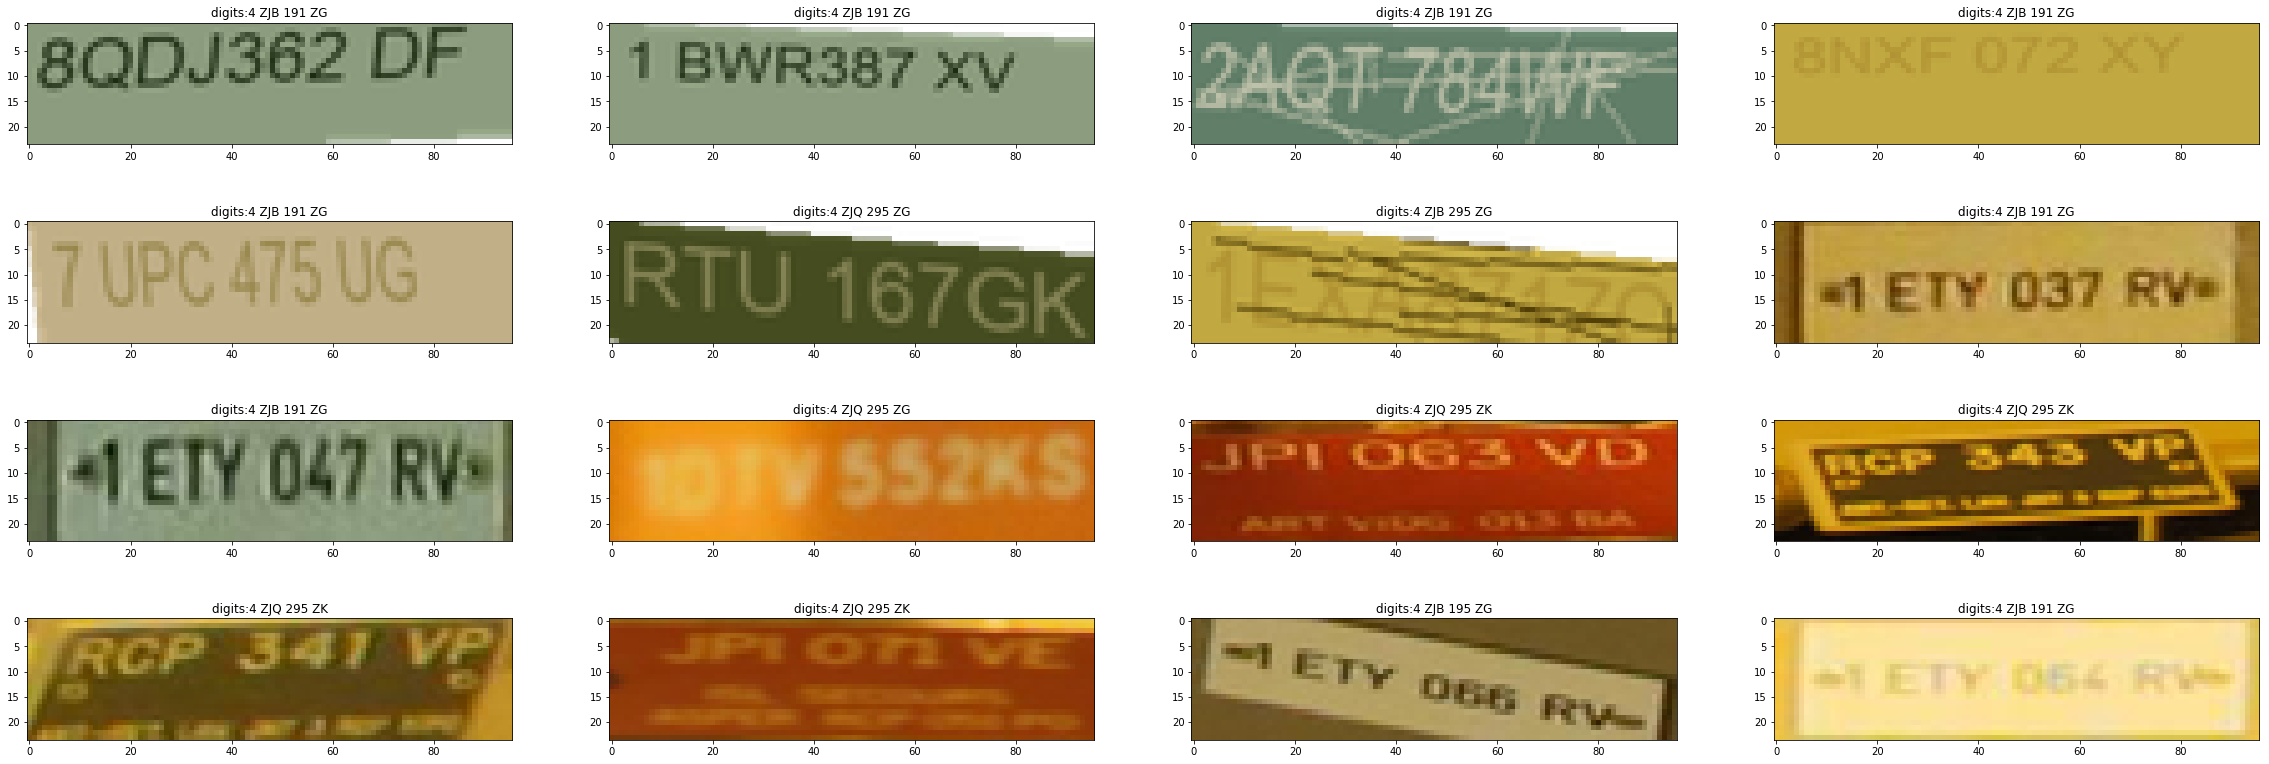

In [8]:
fig, axes = plt.subplots(4, 4, figsize=(40, 14))
for i, ax in enumerate(axes.flat):
    images_vals = images_val[i]
    digits = digits_predictions_string_val[i]
    letters_predictions_string_vals = letters_predictions_string_val[i]
    letters = []
    for i in range(5):
        letters += chr(letters_predictions_string_vals[i] - 1 + ord('A'))

    st = str(digits[0]) + ' ' + letters[0] + letters[1] + letters[2] + ' ' + str(digits[1]) + str(digits[2]) + str(digits[3]) + ' ' + letters[3] + letters[4]
    ax.set_title('digits:' + st)
    ax.imshow(images_vals)

In [9]:
sess.close()